<a href="https://colab.research.google.com/github/Saksham0905/BestSellers/blob/main/mlproject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('sns version',sns.__version__)
sns.set_style('whitegrid')
import string
import re
df=pd.read_csv('/content/bestsellers with categories.csv')

sns version 0.13.2


In [ ]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
df.tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


In [ ]:
df['Genre'][df['Genre']=='Fiction'].count()

240

In [ ]:
df.rename(columns={'User Rating':'user_rating'},inplace=True)
df[df.Author=='J. K. Rowling']
df[df.Author=='J.K. Rowling']
df.loc[df.Author=='J. K. Rowling','Author']='J.K. Rowling'
df['namelen']=df.Name.apply(lambda x:len(x)-x.count(" "))#finding length of name without white spaces
df.head()

,Name,Author,user_rating,Reviews,Price,Year,Genre,namelen
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,26
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,15
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,32
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,20
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,59


In [ ]:
punc=string.punctuation # storing punctuations in punc
print(punc)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
def countpunc(text):#function to count the percentage of punctuations in the given name
        count=sum(1 for char in text if char in punc)
        return round(count/(len(text)-text.count(" "))*100,3)

In [ ]:
df['punc%']=df.Name.apply(lambda x:countpunc(x))
df.head()

,Name,Author,user_rating,Reviews,Price,Year,Genre,namelen,punc%
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,26,3.846
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,15,20.000
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,32,3.125
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,20,10.000
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,59,10.169


In [ ]:
nodupli=df.drop_duplicates('Name')
genrecount=df['Genre'].value_counts()
print(genrecount)

Genre
Non Fiction    310
Fiction        240
Name: count, dtype: int64


In [ ]:

def makeautopct(values):
  def myautopct(pct):
    total=sum(values)
    val=int(round(pct*total/100.0))
    return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
  return myautopct


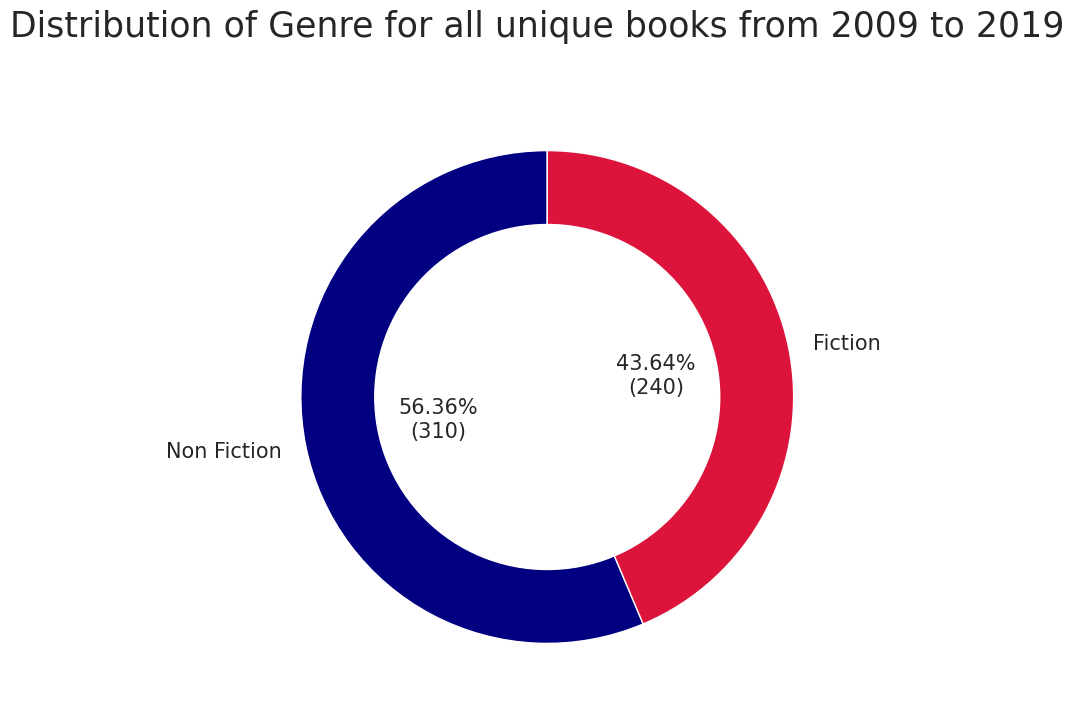

In [ ]:
fig,ax=plt.subplots(figsize=(8,8))
centre_circle=plt.Circle((0,0),0.7,color='white')
plt.pie(x=genrecount.values,labels=genrecount.index,autopct=makeautopct(genrecount.values),startangle=90,colors=['navy','crimson'],pctdistance=0.45,textprops={'size':15})
ax.add_artist(centre_circle)
fig.suptitle('Distribution of Genre for all unique books from 2009 to 2019',fontsize=25)
fig.show()

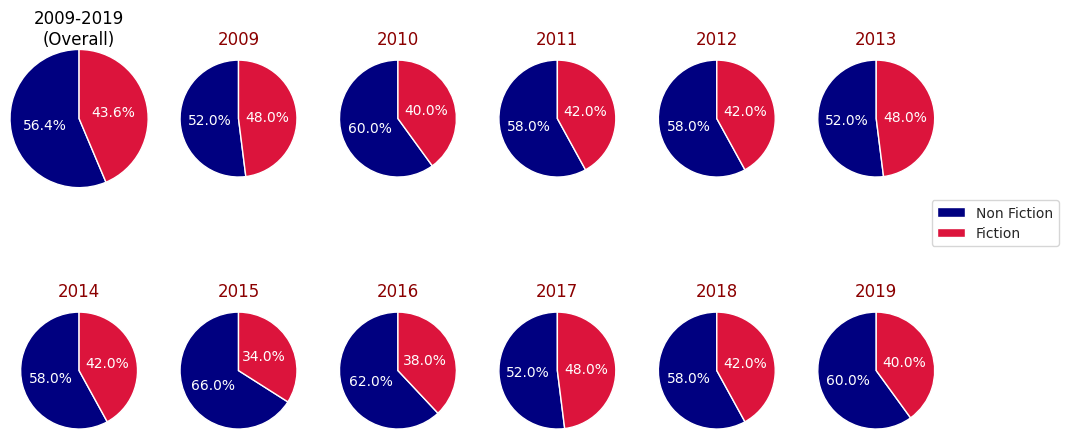

In [ ]:
y1=np.arange(2009,2014)
y2=np.arange(2014,2020)
fig,ax=plt.subplots(2,6,figsize=(12,6))
ax[0,0].pie(x=genrecount,labels=None,autopct='%1.1f%%',textprops={'color':'white'},pctdistance=0.5,radius=1.3,startangle=90,colors=['navy','crimson'])
ax[0,0].set_title('2009-2019\n(Overall)',color='black')
for i,year in enumerate(y1):
  counts=df.loc[df['Year']==year,'Genre'].value_counts()
  ax[0,i+1].set_title(year,color='darkred')
  ax[0,i+1].pie(x=counts,labels=None,textprops={'color':'white'},autopct='%1.1f%%',pctdistance=0.5,radius=1.1,startangle=90,colors=['navy','crimson'])
for i,year in enumerate(y2):
  counts=df.loc[df['Year']==year,'Genre'].value_counts()
  ax[1,i].set_title(year,color='darkred')
  ax[1,i].pie(x=counts,labels=None,textprops={'color':'white'},autopct='%1.1f%%',pctdistance=0.5,radius=1.1,startangle=90,colors=['navy','crimson'])
fig.legend(genrecount.index,loc='center right')
fig.show()



In [ ]:
bestnfauth=df.groupby(['Author','Genre']).agg({'Name':'count'}).unstack()['Name','Non Fiction'].sort_values(ascending=False)[:11]
bestfauth=df.groupby(['Author','Genre']).agg({'Name':'count'}).unstack()['Name','Fiction'].sort_values(ascending=False)[:11]

<ipython-input-103-336811980bcb>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(bestnfauth.index,fontsize=30,fontweight='bold')
<ipython-input-103-336811980bcb>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(bestfauth.index,fontweight='bold',fontsize=30)


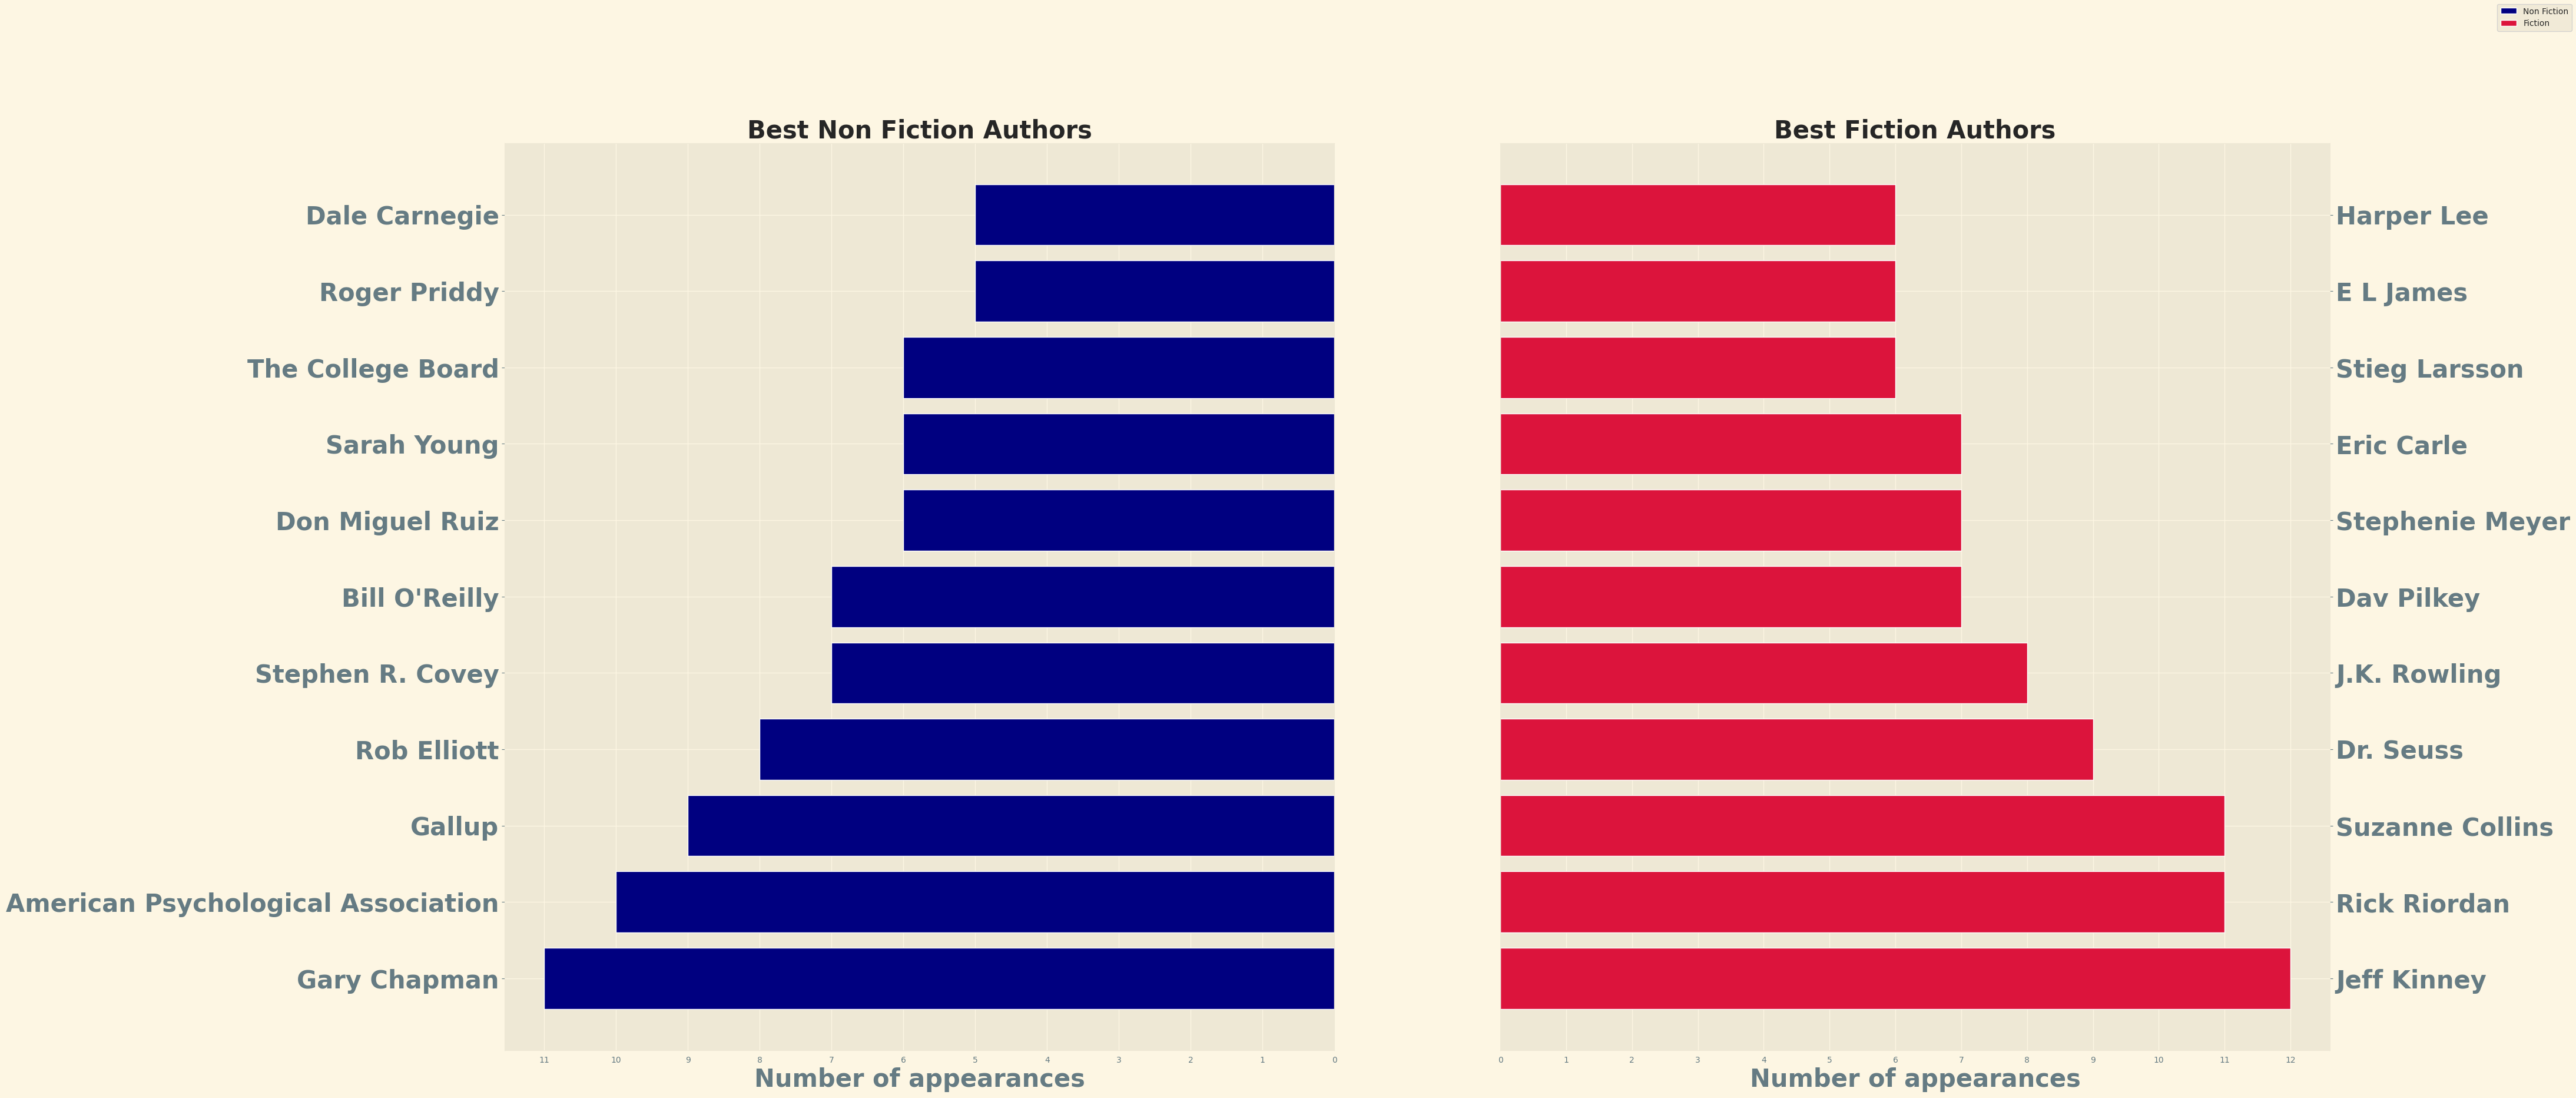

In [ ]:
with plt.style.context('Solarize_Light2'):
  fig,ax=plt.subplots(1,2,figsize=(40,20))
  ax[0].barh(y=bestnfauth.index,width=bestnfauth.values,color='navy')
  ax[0].invert_xaxis()
  ax[0].yaxis.tick_left()
  ax[0].set_xticks(np.arange(max(bestnfauth)+1))
  ax[0].set_yticklabels(bestnfauth.index,fontsize=30,fontweight='bold')
  ax[0].set_xlabel('Number of appearances',fontsize=30,fontweight='bold')
  ax[0].set_title('Best Non Fiction Authors',fontsize=30,fontweight='bold')
  ax[1].barh(y=bestfauth.index,width=bestfauth.values,color='crimson')
  ax[1].yaxis.tick_right()
  ax[1].set_xticks(np.arange(max(bestfauth)+1))
  ax[1].set_yticklabels(bestfauth.index,fontweight='bold',fontsize=30)
  ax[1].set_xlabel('Number of appearances',fontsize=30,fontweight='bold')
  ax[1].set_title('Best Fiction Authors',fontsize=30,fontweight='bold')
  fig.legend(genrecount.index,loc='upper right')
plt.show()



In [ ]:
noofbestauth=20
topauth=df.Author.value_counts().nlargest(noofbestauth)
print(topauth)

Author
Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
Dr. Seuss                              9
Gallup                                 9
Rob Elliott                            8
J.K. Rowling                           8
Eric Carle                             7
Stephen R. Covey                       7
Stephenie Meyer                        7
Dav Pilkey                             7
Bill O'Reilly                          7
Don Miguel Ruiz                        6
E L James                              6
Stieg Larsson                          6
Harper Lee                             6
Sarah Young                            6
The College Board                      6
Name: count, dtype: int64


<ipython-input-116-c93ec20c5fb5>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(topauth.index,fontweight='bold')


[12, 3, 10, 5, 1, 2, 1, 2, 8, 1, 1, 7, 6, 6, 1, 5, 4, 2, 1, 2]


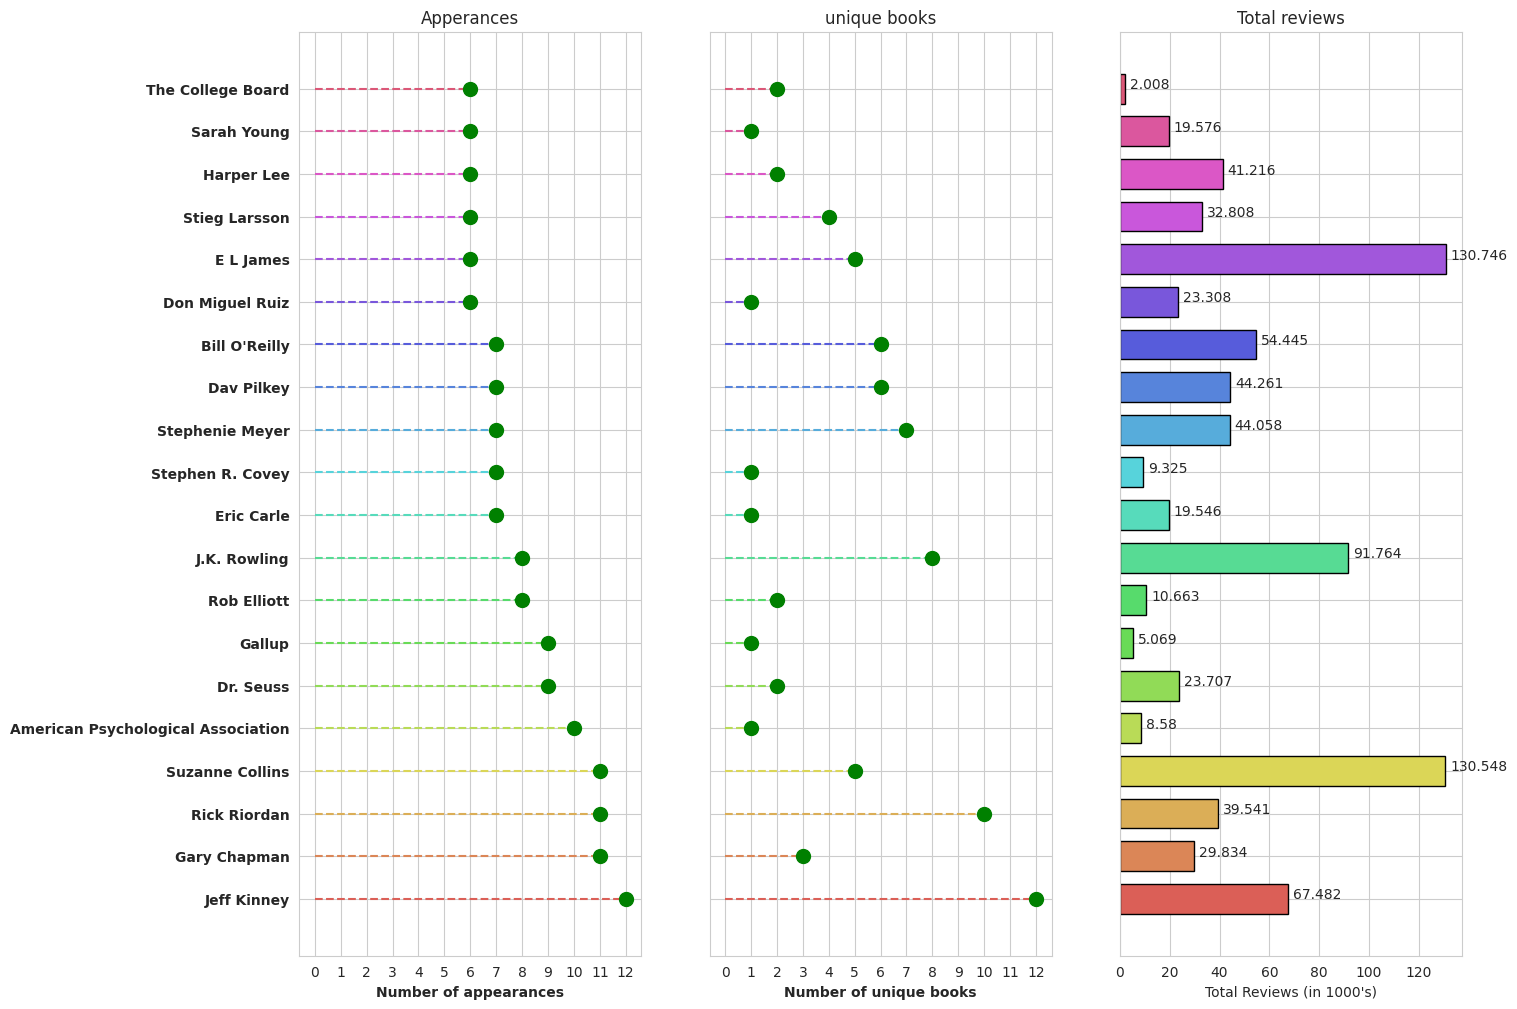

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(15,12),sharey=True)
color = sns.color_palette("hls", noofbestauth)
ax[0].hlines(y=topauth.index,xmin=0,xmax=topauth.values,color=color,linestyles='dashed')
ax[0].plot(topauth.values,topauth.index,'go',markersize=10)
ax[0].set_xlabel('Number of appearances',fontweight='bold')
ax[0].set_xticks(np.arange(max(topauth)+1))
ax[0].set_yticklabels(topauth.index,fontweight='bold')
ax[0].set_title('Apperances')
uniquebook=[]
for i in topauth.index:
  uniquebook.append(df.loc[df.Author==i,'Name'].nunique())
print(uniquebook)
ax[1].hlines(y=topauth.index,xmin=0,xmax=uniquebook,color=color,linestyles='dashed')
ax[1].plot(uniquebook,topauth.index,'go',markersize=10)
ax[1].set_xlabel('Number of unique books',fontweight='bold')
ax[1].set_xticks(np.arange(max(uniquebook)+1))

ax[1].set_title('unique books')
totalreview=[]
for i in topauth.index:
  totalreview.append(nodupli[nodupli.Author==i]['Reviews'].sum()/1000)

ax[2].barh(y=topauth.index, width=totalreview,color=color, edgecolor='black', height=0.7)
for name, val in zip(topauth.index, totalreview):
    ax[2].text(val+2, name, val)
ax[2].set_xlabel("Total Reviews (in 1000's)")
ax[2].set_title('Total reviews')

plt.show()